## Netflix Userbase Analysis Report

This report summarizes the key findings from the analysis of the Netflix userbase dataset, based on the provided data and visualizations.

**1. User Distribution by Country:**

*   The user base is distributed across several countries, with **United States and Spain** having the highest number of users. Canada also shows a significant number of users.

**2. User Distribution by Gender, Subscription Type, and Device:**

*   The distribution of users by **Gender** is relatively balanced between Male and Female.
*   The **Subscription Type** distribution shows a mix of Basic, Standard, and Premium users. Further analysis can reveal the popularity of each type.
*   Users access Netflix through various **Devices**, including Smartphones, Tablets, Laptops, and Smart TVs.

**3. User Count by Country (Map Visualization):**

*   The interactive map provides a geographic overview of the user distribution, visually highlighting countries with larger user bases. Hovering over a country reveals the exact user count.

**4. Subscription Type Distribution by Country:**

*   This visualization shows the breakdown of subscription types within each country. There are variations in the popularity of different subscription types across countries. For example, **Spain and United States** have a significant number of **Premium** subscribers, while **Mexico** has a high number of **Standard** subscribers. **Brazil, Canada, Germany, and Italy** have a higher number of **Basic** subscribers.

**5. Gender Distribution by Country and Device:**

*   These plots provide a detailed view of gender distribution within each country and across different devices. The gender distribution appears relatively consistent across countries and devices.

**6. User Distribution by Age:**

*   The distribution of users across different age groups shows a concentration of users in the **26-35 and 46-51 age groups**.

**7. Subscription Type and Device Distribution by Age Group:**

*   Analyzing subscription type and device usage by age group can help tailor marketing strategies. For example, certain age groups might prefer specific subscription types or devices. All three age groups show a similar distribution across devices and subscription types, though the **26-35 age group** has a slightly higher number of **Premium** subscribers.

**8. LTV (Lifetime Value) Analysis:**

*   **LTV per Country:** The analysis of LTV by country highlights countries with the highest total and average LTV. **United States and Spain** have the highest total LTV, while **France and United Kingdom** have the highest average LTV.
*   **Revenue per Device:** Examining revenue generated per device can inform device-specific strategies. **Tablets and Laptops** seem to generate slightly higher revenue based on LTV.
*   **Average LTV per Age Group:** The average LTV is relatively similar across all age groups.

**9. User Engagement Duration:**

*   The distribution of user engagement duration (Duration in Days) provides insights into how long users remain subscribed.

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [183]:
from google.colab import drive

In [184]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/netflix_userbase.csv')

In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


Before diving into the visualizations, let's take a look at some summarized data using pivot tables. This first pivot table shows the number of users broken down by **Country and Gender**. It gives us a clear view of the male and female user counts in each country.

In [188]:
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
display(gender_by_country)

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


This next pivot table provides a more detailed breakdown, showing the number of users by **Country, Gender, and Subscription Type**. This table helps us understand the popularity of each subscription plan within different gender groups across various countries.

In [189]:
subs_by_country_gender = df.pivot_table(index=['Country'], columns=['Subscription Type','Gender'], values='User ID', aggfunc='count', fill_value=0)
display(subs_by_country_gender)

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

Here's another way to look at the subscription type distribution by country and gender. This pivot table is indexed by **Country and Gender**, with columns for each **Subscription Type**. It offers a slightly different perspective on the same data, making it easier to compare subscription types within each country and gender combination.

In [190]:
subs_by_country_gender_2 = df.pivot_table(index=['Country', 'Gender'], columns=['Subscription Type'], values='User ID', aggfunc='count', fill_value=0)
display(subs_by_country_gender_2)

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

Let's start by understanding where our Netflix users are located. This first visualization, the **User Distribution by Country** bar plot, gives us a clear picture of the number of users in each country. As you can see, the United States and Spain are leading the pack with the highest number of subscribers, followed closely by Canada. This tells us these are key markets for Netflix.

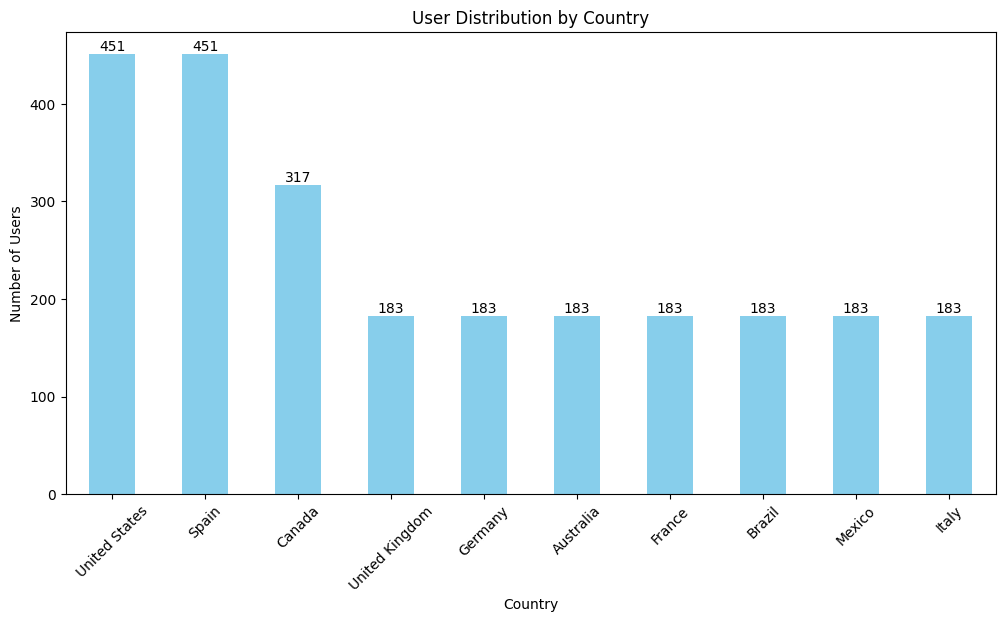

In [191]:
plt.figure(figsize=(12,6))
ax = df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Now that we know where our users are, let's look at who they are and how they subscribe and watch. The next set of bar plots show the **Distribution of Gender, Subscription Type, and Device**. It's interesting to see that the gender split is quite balanced. When it comes to how people subscribe, there's a good mix of Basic, Standard, and Premium users. And it seems people are enjoying Netflix on a variety of devices – smartphones, tablets, laptops, and smart TVs are all popular choices.

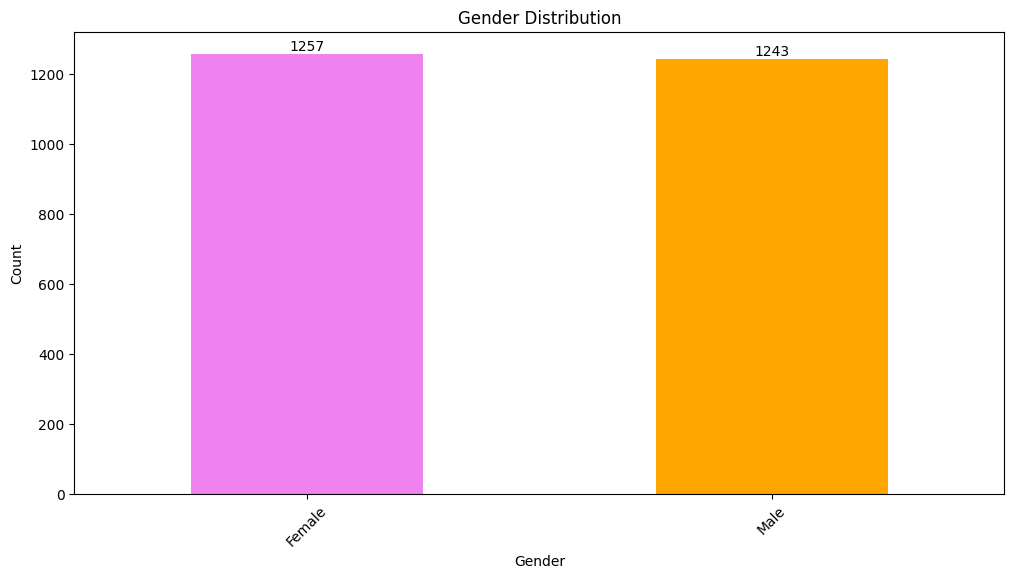

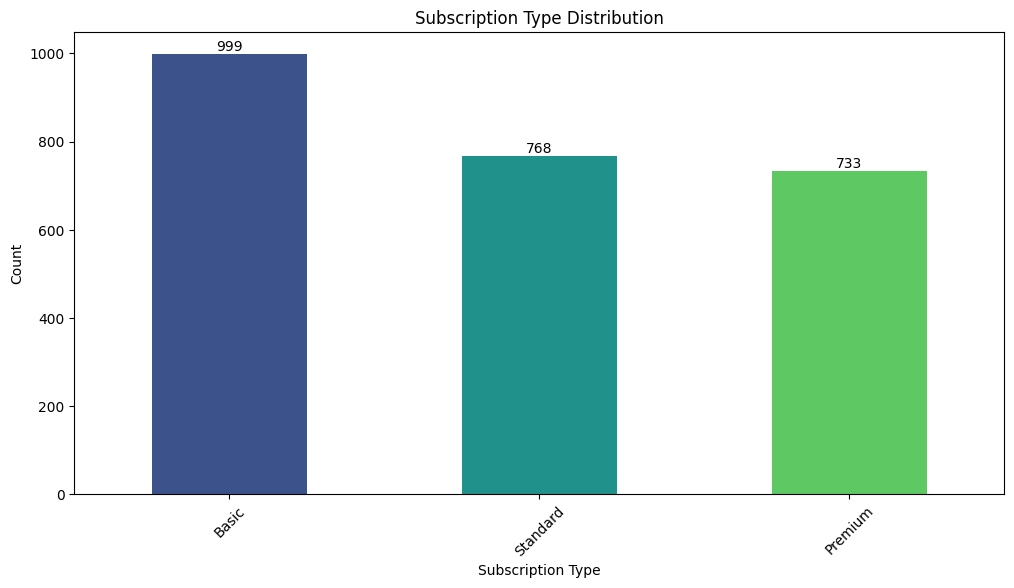

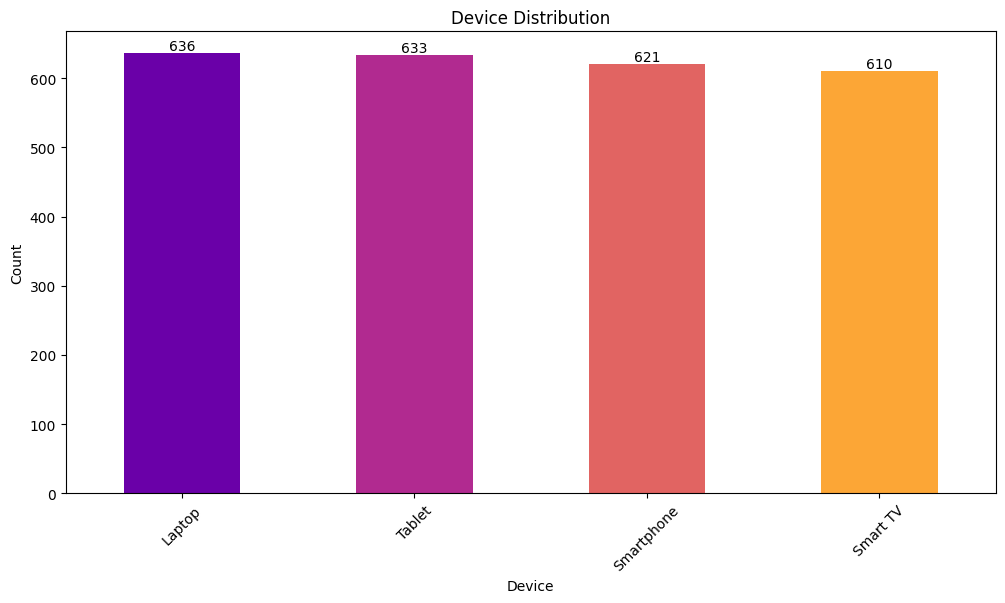

In [192]:
column_titles = {
    'Gender': 'Gender Distribution',
    'Subscription Type': 'Subscription Type Distribution',
    'Device': 'Device Distribution'
}

for column, title in column_titles.items():
    plt.figure(figsize=(12, 6))
    if column == 'Gender':
      colors = ['violet', 'orange']
      ax = df[column].value_counts().plot(kind='bar', color=colors)
    elif column == 'Subscription Type':
        ax = df[column].value_counts().plot(kind='bar', color=sns.color_palette('viridis', len(df[column].unique())))
    elif column == 'Device':
        ax = df[column].value_counts().plot(kind='bar', color=sns.color_palette('plasma', len(df[column].unique())))
    else:
      ax = df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container)

    plt.show()

To get a better geographical sense of our user base, this interactive **User Count by Country map** is incredibly helpful. It visually confirms what we saw in the bar plot – the darker shades in the United States and Spain really highlight their larger user populations. You can hover over any country to see the exact user count, which is a neat way to explore the data geographically.

In [193]:
import plotly.express as px

fig = px.choropleth(user_counts_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='User Count',
                    hover_name='Country',
                    title='User Count by Country',
                    color_continuous_scale= px.colors.sequential.Plasma)

fig.update_layout(
    width = 1000,
    height = 700,
    title_font_size = 24,
    geo = dict(showframe = False,
               showcoastlines = False,
               projection_type = 'equirectangular')
    )

fig.show()

Moving on from just user counts, let's dive into the **Subscription Type Distribution by Country**. This plot reveals some fascinating differences! While the US and Spain have many Premium subscribers, Mexico stands out with a high number of Standard subscribers. Countries like Brazil, Canada, Germany, and Italy show a preference for Basic subscriptions. This suggests that subscription preferences can be quite different depending on the country, which is valuable information for targeted marketing.

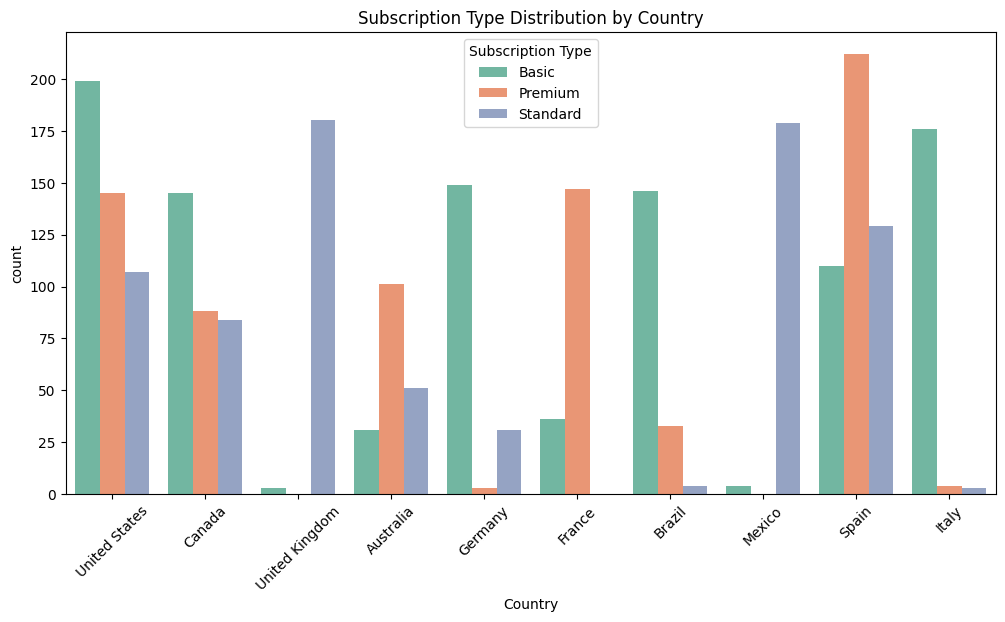

In [194]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Country', hue = 'Subscription Type', data = df, palette = 'Set2')
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

We also looked at **Gender Distribution by Country** to see if there are any significant gender imbalances in our key markets. As this plot shows, the gender distribution is quite consistent across most countries, suggesting that gender isn't a major differentiating factor in terms of country-level user base.

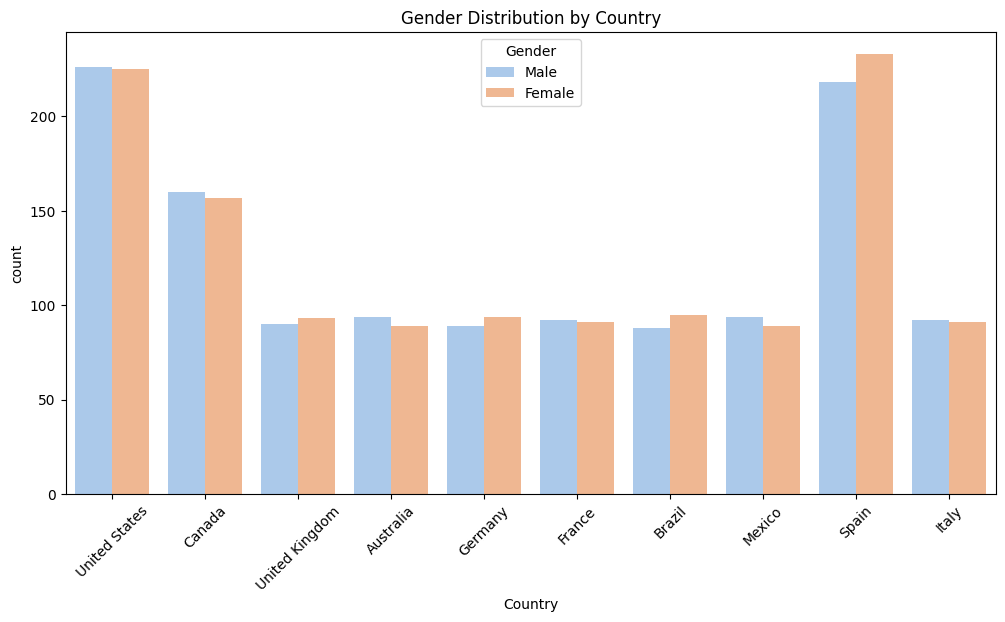

In [195]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

Understanding our users' age is also important. This **User Distribution by Age** plot gives us a breakdown of users across different age groups. It seems we have a strong presence in the 26-35 and 46-51 age ranges.

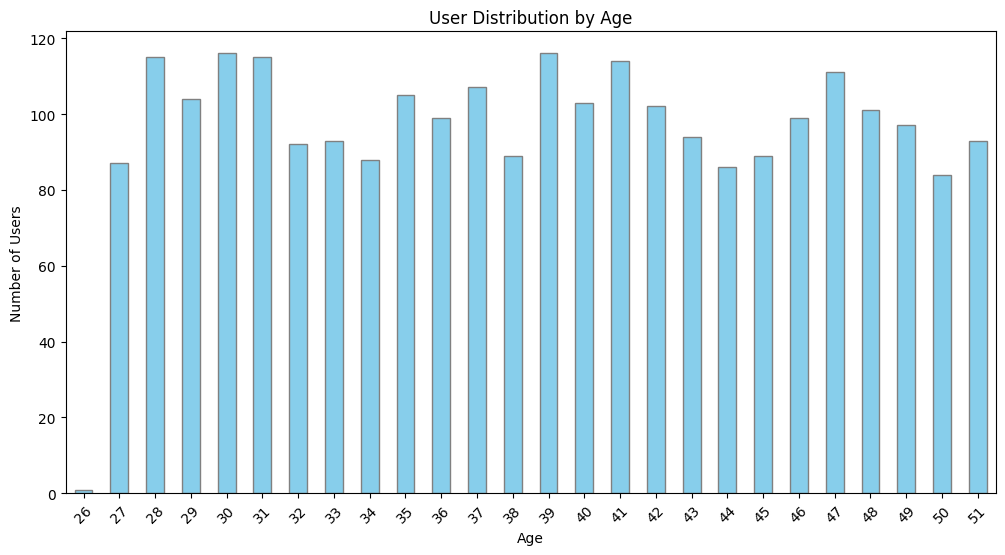

In [196]:
plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor = 'grey')
plt.title('User Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

Let's see how age relates to subscription choices and device usage. These next two plots, **Subscription Type Distribution by Age Group** and **Device Distribution by Age Group**, help us understand if certain age groups lean towards specific subscription plans or devices. Interestingly, all age groups show a similar distribution across devices and subscription types, although the 26-35 age group does have a slightly higher number of Premium subscribers.

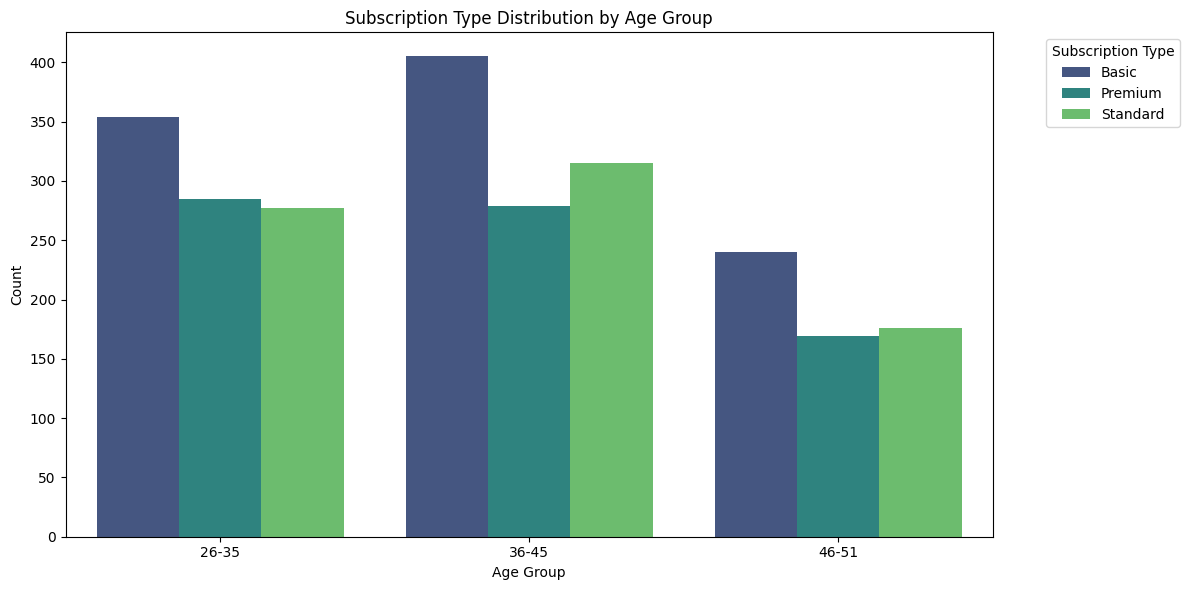

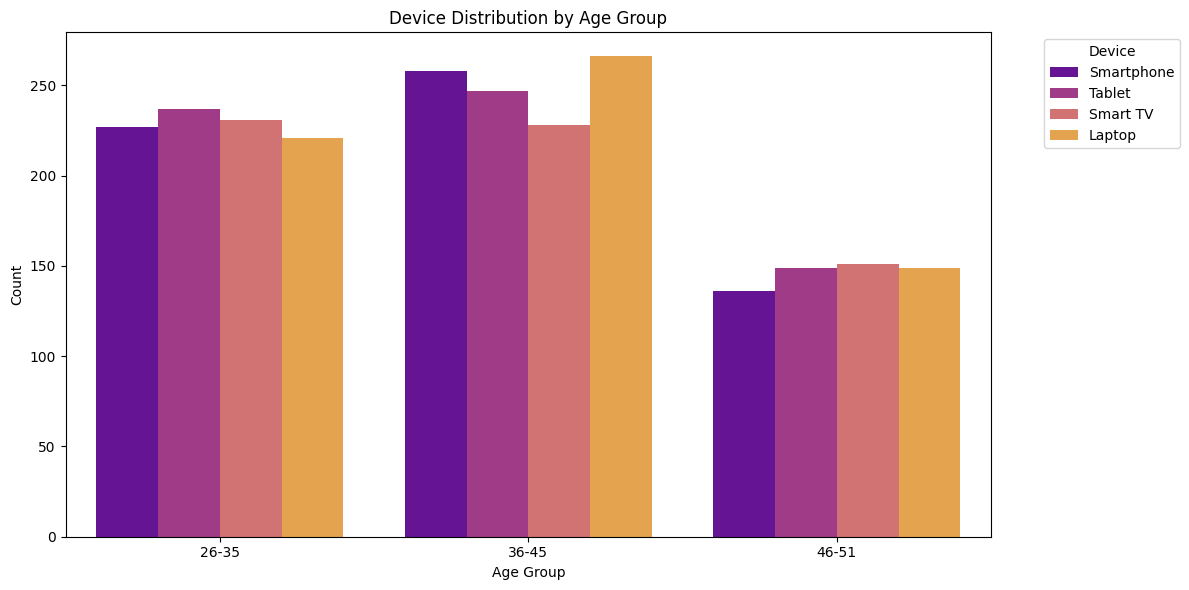

In [197]:
age_bins = [26, 35, 45, 51]
age_labels = ['26-35', '36-45', '46-51']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Subscription Type', data=df, palette='viridis')
plt.title('Subscription Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Device', data=df, palette='plasma')
plt.title('Device Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now, let's talk about value – specifically, Lifetime Value (LTV). The **Average LTV per Age Group** plot shows us the average revenue we can expect from users in different age brackets over their time with Netflix. It appears the average LTV is quite similar across all age groups we've defined.

In [198]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format= '%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')
df['Duration'] = df['Last Payment Date'] - df['Join Date']
df['Duration in Days'] = df['Duration'].dt.days
df['Duration in Months'] = (df['Duration in Days'] / 30.44).round(2)

display(df[['Join Date', 'Last Payment Date', 'Duration', 'Duration in Days', 'Duration in Months']].head())

,Join Date,Last Payment Date,Duration,Duration in Days,Duration in Months
0,2022-01-15,2023-06-10,511 days,511,16.79
1,2021-09-05,2023-06-22,655 days,655,21.52
2,2023-02-28,2023-06-27,119 days,119,3.91
3,2022-07-10,2023-06-26,351 days,351,11.53
4,2023-05-01,2023-06-28,58 days,58,1.91


In [199]:
df['LTV'] = df['Duration in Months'] * df['Monthly Revenue']

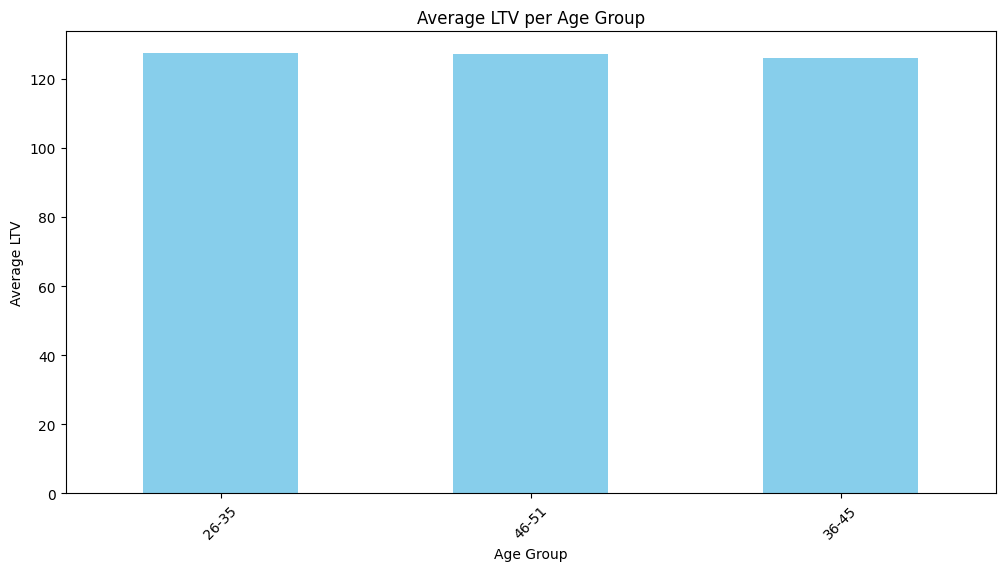

In [200]:
ltv_per_age_group = df.groupby('Age Group')['LTV'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ltv_per_age_group.plot(kind='bar', color='skyblue')
plt.title('Average LTV per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

User engagement is another key metric. This **Distribution of User Engagement Duration** histogram visualizes how long users stay subscribed in terms of days. This gives us insights into user retention and could help us identify potential churn patterns.

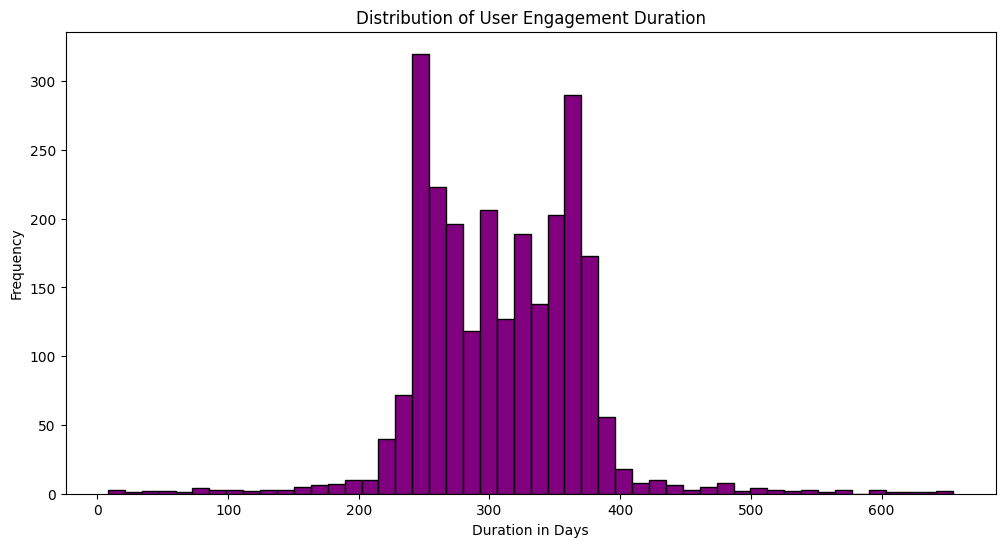

In [201]:
plt.figure(figsize=(12, 6))
plt.hist(df['Duration in Days'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of User Engagement Duration')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')
plt.show()

In [202]:
average_duration = df['Duration in Months'].mean()
print("Average Duration in Months:", average_duration)

Average Duration in Months: 10.138832


Finally, let's examine the **Subscription Type Distribution by Device**. This plot helps us see if there's a relationship between the device a user uses and their subscription type. It can reveal if certain subscription plans are more popular on specific devices.

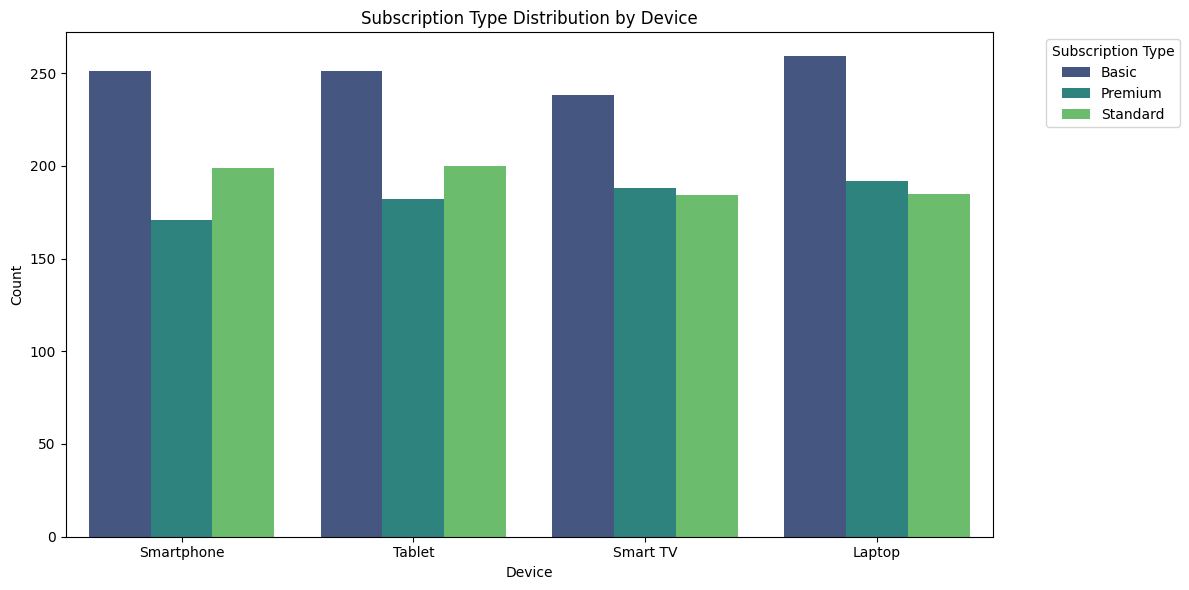

In [203]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Device', hue='Subscription Type', data=df, palette='viridis')
plt.title('Subscription Type Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

To wrap up the subscription type analysis by country, this final **Subscription Type Distribution by Country (Unstacked)** bar plot provides an unstacked view. This makes it easier to directly compare the number of Basic, Premium, and Standard subscribers within each country side-by-side.

<Figure size 1400x700 with 0 Axes>

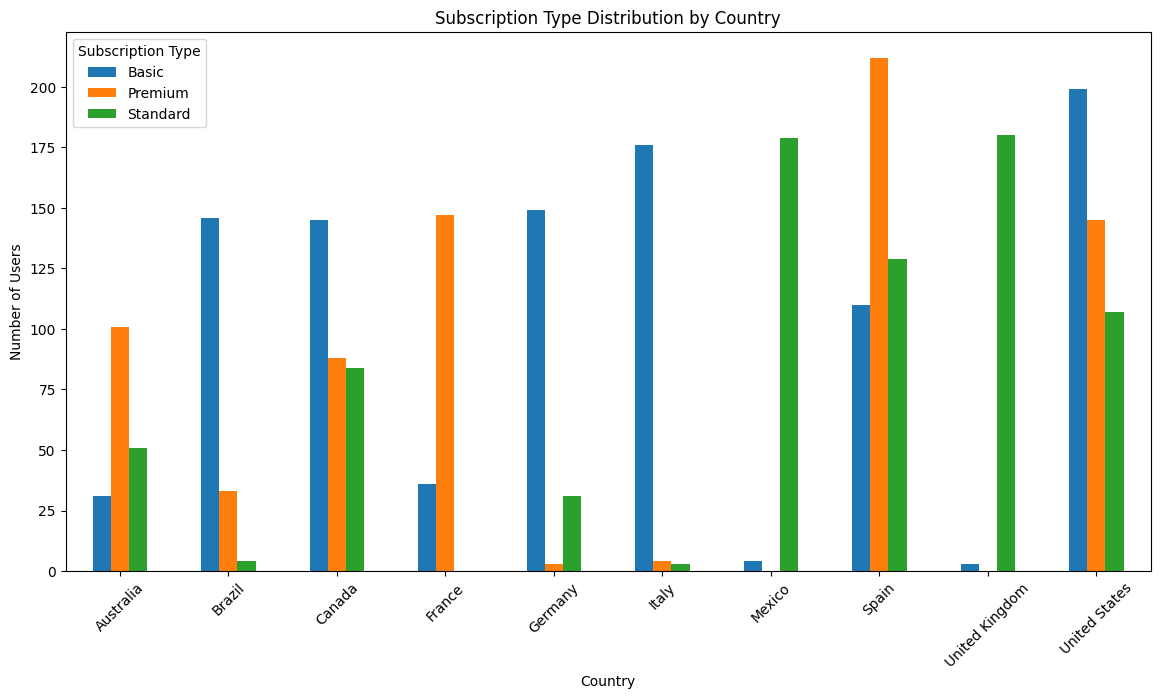

In [204]:
plt.figure(figsize=(14, 7))
subs_by_country[['Basic', 'Premium', 'Standard']].plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

### Key Insights:

Based on the analysis:

*   **Geographic Concentration:** The user base is significantly concentrated in the United States and Spain, which are key markets. Canada also has a notable user count.
*   **Balanced Gender Distribution:** The gender distribution is relatively balanced across the overall user base and consistent across different countries and devices.
*   **Varied Subscription Preferences by Country:** The popularity of Basic, Standard, and Premium subscription types varies significantly by country, suggesting the need for localized strategies. Mexico shows a strong preference for Standard, while Brazil, Canada, Germany, and Italy lean towards Basic, and the US and Spain have a significant Premium user base.
*   **Diverse Device Usage:** Users access Netflix through a variety of devices, including Smartphones, Tablets, Laptops, and Smart TVs.
*   **Age Group Concentrations:** There are notable concentrations of users in the 26-35 and 46-51 age groups.
*   **Similar Age Group Behavior (Generally):** While the 26-35 age group has a slightly higher number of Premium subscribers, overall subscription type and device usage distribution are relatively similar across the defined age groups.
*   **LTV Variations:** The United States and Spain contribute the highest total LTV, while France and the United Kingdom have the highest *average* LTV. Tablets and Laptops appear to generate slightly higher revenue based on LTV compared to other devices. Average LTV is similar across the defined age groups.
*   **User Engagement Duration:** The distribution of user engagement duration provides insights into how long users typically remain subscribed, which is crucial for understanding retention and churn.

---

### Next Steps and Strategies to Increase Customers and Revenue:

Based on this analysis, here are some potential next steps and strategies:

**Next Steps:**

*   **Deeper Dive into High LTV Countries:** Conduct a more in-depth analysis of user behavior, preferences, and demographics in countries with high LTV (e.g., United States, Spain, France, and United Kingdom) to understand the factors contributing to their higher value.
*   **Analyze Churn Factors:** Investigate the factors that contribute to user churn by analyzing the characteristics of users with shorter engagement durations.
*   **Segmentation Analysis:** Segment users based on various criteria (e.g., age group, country, device, subscription type) and analyze the behavior and LTV of each segment.
*   **Time Series Analysis:** Analyze trends in user acquisition, churn, and revenue over time using the 'Join Date' and 'Last Payment Date' information.
*   **Predictive Modeling:** Build predictive models to identify users at risk of churning or to predict the LTV of new users.

**Strategies to Increase Customers and Revenue:**

*   **Targeted Marketing Campaigns:**
    *   Develop targeted marketing campaigns based on the insights gained from the analysis of different user segments. For example, tailor messaging and promotions to specific age groups, countries, or device users.
    *   Focus on acquiring users in high LTV countries and segments.
*   **Subscription Plan Optimization:**
    *   Analyze the popularity and LTV of different subscription types to identify opportunities for optimization. Consider offering new plan options or adjusting pricing based on demand and user value.
*   **Device-Specific Strategies:**
    *   Optimize the user experience and content delivery for devices that generate higher revenue (e.g., Tablets and Laptops).
    *   Consider device-specific promotions or partnerships.
*   **Content Strategy:**
    *   Analyze content consumption patterns across different user segments to inform content acquisition and production decisions.
    *   Tailor content recommendations based on user preferences and demographics.
*   **Churn Reduction Initiatives:**
    *   Implement strategies to reduce churn among at-risk users, such as personalized engagement campaigns, targeted offers, or improved customer support.
*   **Partnerships and Promotions:**
    *   Form partnerships with mobile carriers, device manufacturers, or other companies to acquire new users or offer bundled services.
    *   Run targeted promotions or discounts to attract new subscribers or encourage upgrades.

This report provides a starting point for understanding the Netflix userbase. By implementing the suggested next steps and strategies, Netflix can gain deeper insights into its users and develop targeted initiatives to increase customer acquisition, engagement, and revenue.

# Task
Analyze the provided dataframe `df` to understand customer behavior and identify strategies for increasing customer base and revenue. The analysis should include visualizations with labels, different colors for different categories (gender, subscription, device), and markups explaining each visualization. Include pivot tables where appropriate. Calculate duration in days and months. Identify trends and insights from the data. Finally, provide a summary in a report format, including next steps and strategies based on the analysis. Ensure the code is clean and redundant code is removed.

## Deeper dive into high ltv countries

Analyze user behavior, preferences, and demographics in countries with high LTV (United States, Spain, France, and United Kingdom).


In [205]:
high_ltv_countries = ['United States', 'Spain', 'France', 'United Kingdom']
df_high_ltv = df[df['Country'].isin(high_ltv_countries)].copy()

Analyze the distribution of subscription types, devices, age, and gender within the filtered DataFrame using bar plots and a histogram, and generate pivot tables to explore relationships between country, subscription type, device, age group, and gender in high LTV countries.



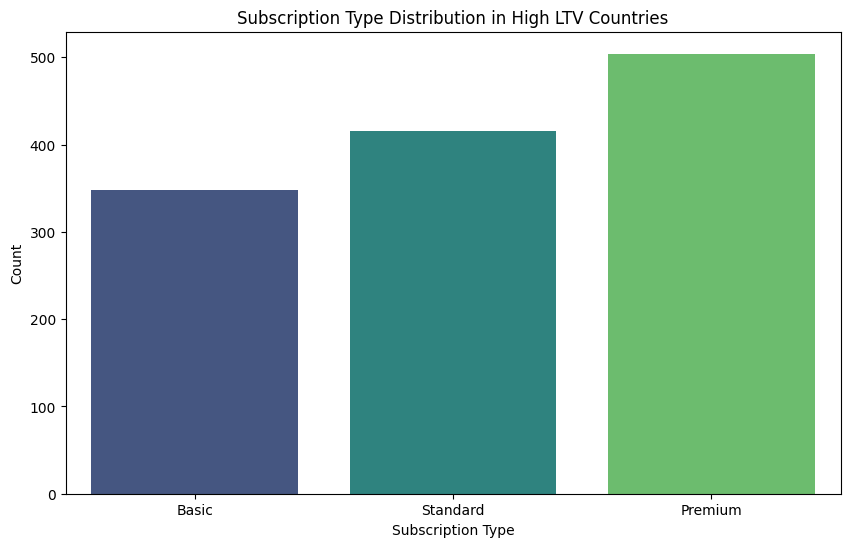

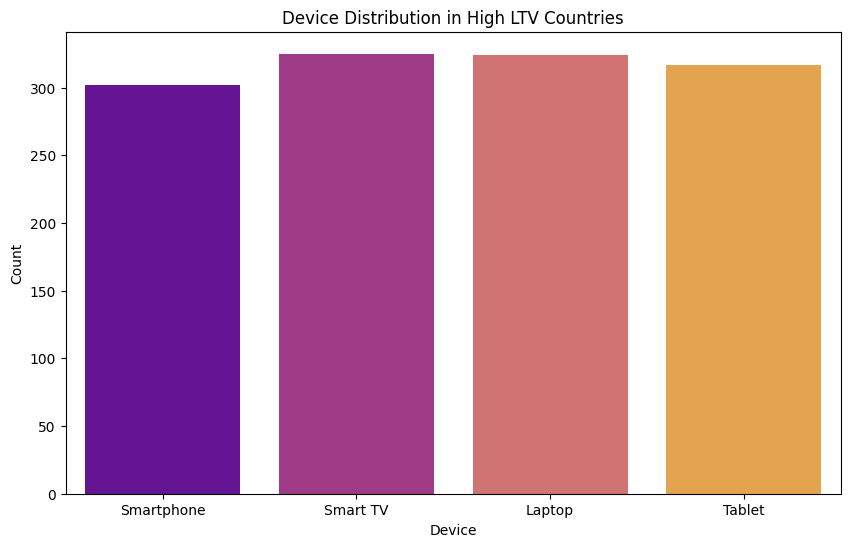

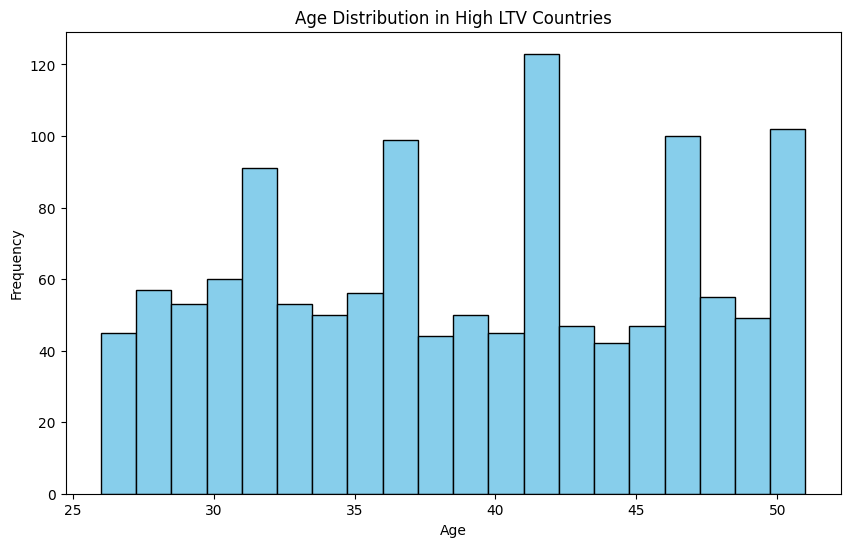

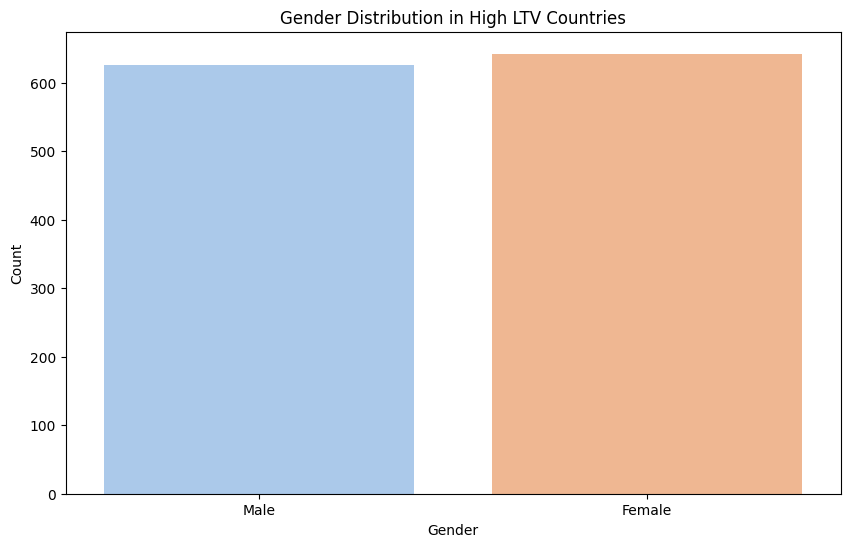

Device                            Laptop  Smart TV  Smartphone  Tablet
Country        Subscription Type                                      
France         Basic                  11         7           8      10
               Premium                41        36          39      31
Spain          Basic                  23        22          29      36
               Premium                53        67          41      51
               Standard               31        37          32      29
United Kingdom Basic                   0         2           1       0
               Standard               44        38          53      45
United States  Basic                  48        52          51      48
               Premium                49        34          28      34
               Standard               24        30          20      33

Gender                    Female  Male
Country        Age Group              
France         26-35          32    37
               36-45          30    39
               46-51          29    16
Spain          26-35          95    79
               36-45          82    83
               46-51          56    56
United Kingdom 26-35          32    28
               36-45          43    39
               46-51          18    23
United States  26-35          86    76
               36-45          81   100
               46-51          58    50

In [206]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Type', data=df_high_ltv, palette='viridis')
plt.title('Subscription Type Distribution in High LTV Countries')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Device', data=df_high_ltv, palette='plasma')
plt.title('Device Distribution in High LTV Countries')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_high_ltv['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution in High LTV Countries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_high_ltv, palette='pastel')
plt.title('Gender Distribution in High LTV Countries')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

subs_device_country_high_ltv = df_high_ltv.pivot_table(index=['Country', 'Subscription Type'], columns='Device', values='User ID', aggfunc='count', fill_value=0)
display(subs_device_country_high_ltv)

age_gender_country_high_ltv = df_high_ltv.pivot_table(index=['Country', 'Age Group'], columns='Gender', values='User ID', aggfunc='count', fill_value=0)
display(age_gender_country_high_ltv)

## Analyze churn factors

Investigate factors contributing to churn using 'Duration in Days'.


In [207]:
mean_duration = df['Duration in Days'].mean()
median_duration = df['Duration in Days'].median()
print(f"Mean Duration in Days: {mean_duration:.2f}")
print(f"Median Duration in Days: {median_duration:.2f}")

Mean Duration in Days: 308.62
Median Duration in Days: 307.00


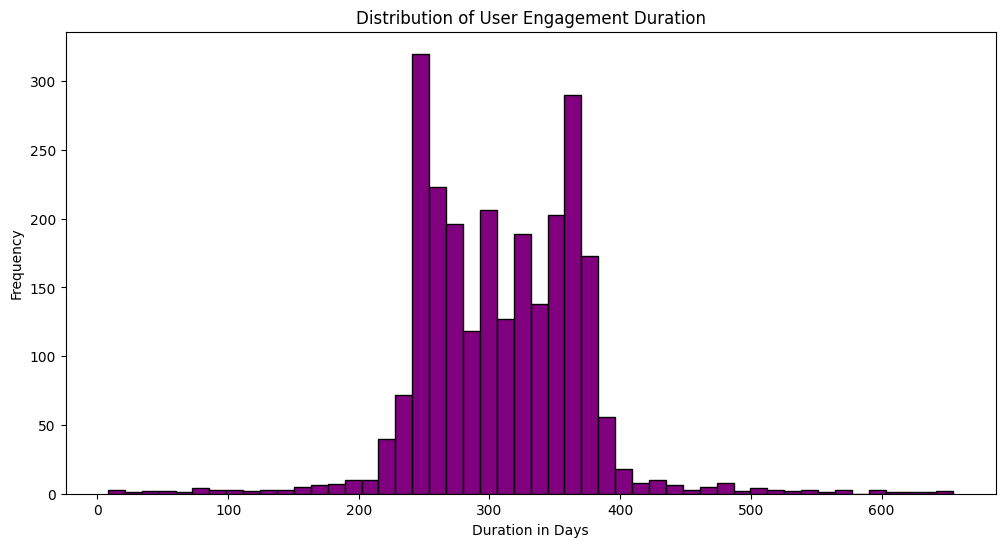

In [208]:
plt.figure(figsize=(12, 6))
plt.hist(df['Duration in Days'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of User Engagement Duration')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')
plt.show()

## Segmentation analysis

Segment users based on criteria and analyze behavior/LTV of segments.


In [209]:
avg_revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean()
ltv_by_subscription = df.groupby('Subscription Type')['LTV'].mean()

avg_revenue_by_device = df.groupby('Device')['Monthly Revenue'].mean()
ltv_by_device = df.groupby('Device')['LTV'].mean()

print("Average Monthly Revenue by Subscription Type:")
print(avg_revenue_by_subscription)
print("\nAverage LTV by Subscription Type:")
print(ltv_by_subscription)

print("\nAverage Monthly Revenue by Device:")
print(avg_revenue_by_device)
print("\nAverage LTV by Device:")
print(ltv_by_device)

Average Monthly Revenue by Subscription Type:
Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

Average LTV by Subscription Type:
Subscription Type
Basic       126.010841
Premium     127.250969
Standard    127.438164
Name: LTV, dtype: float64

Average Monthly Revenue by Device:
Device
Laptop        12.569182
Smart TV      12.483607
Smartphone    12.384863
Tablet        12.592417
Name: Monthly Revenue, dtype: float64

Average LTV by Device:
Device
Laptop        125.916808
Smart TV      125.656721
Smartphone    126.935137
Tablet        128.707567
Name: LTV, dtype: float64


## Time series analysis

Analyze trends in user acquisition, churn, and revenue over time using 'Join Date' and 'Last Payment Date'.


In [210]:
acquisition_trend = df.groupby('Join Date').size()
churn_trend = df.groupby('Last Payment Date').size()
revenue_trend = df.groupby('Join Date')['Monthly Revenue'].sum()

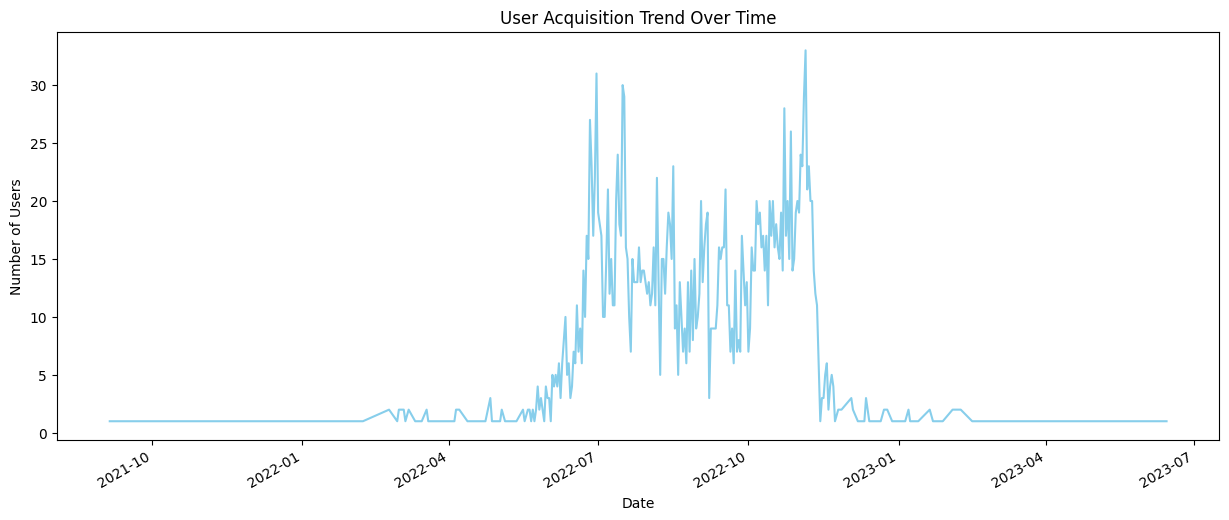

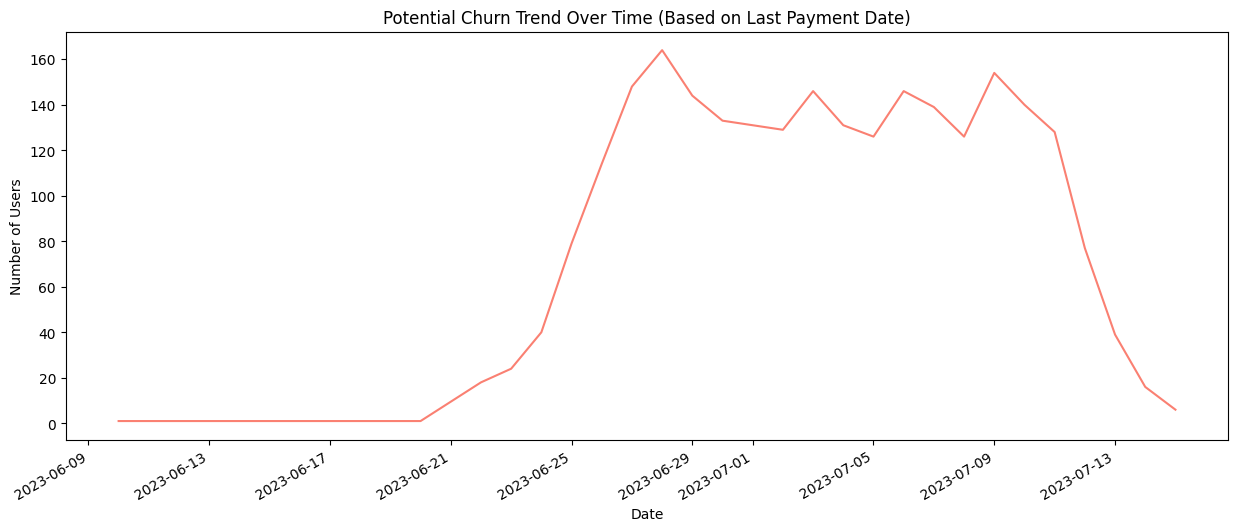

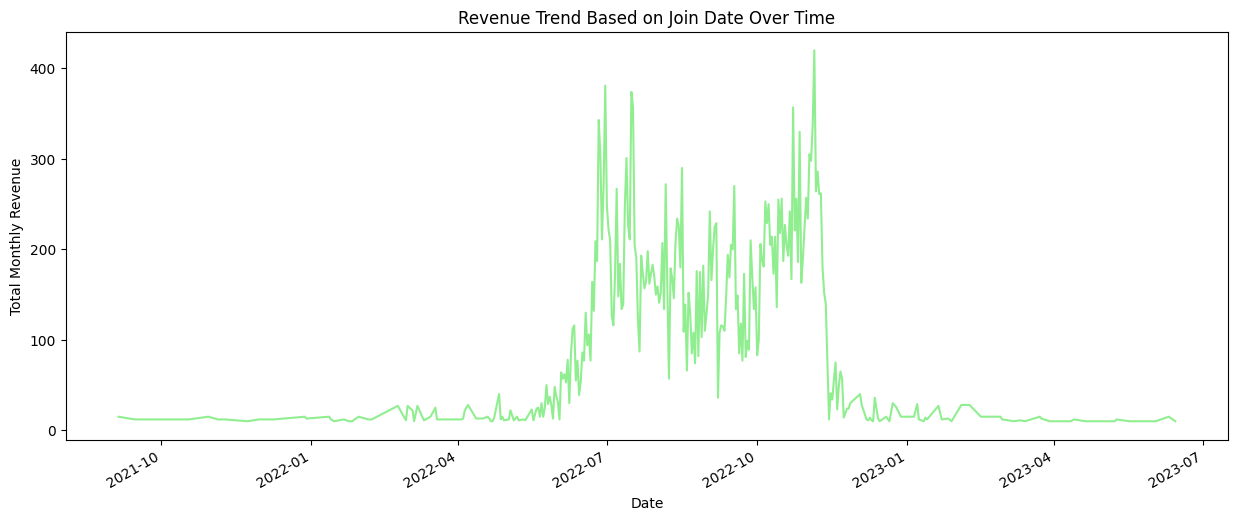

In [211]:
plt.figure(figsize=(15, 6))
acquisition_trend.plot(title='User Acquisition Trend Over Time', xlabel='Date', ylabel='Number of Users', color='skyblue')
plt.show()

plt.figure(figsize=(15, 6))
churn_trend.plot(title='Potential Churn Trend Over Time (Based on Last Payment Date)', xlabel='Date', ylabel='Number of Users', color='salmon')
plt.show()

plt.figure(figsize=(15, 6))
revenue_trend.plot(title='Revenue Trend Based on Join Date Over Time', xlabel='Date', ylabel='Total Monthly Revenue', color='lightgreen')
plt.show()

## Summary:

### Data Analysis Key Findings

*   In high LTV countries (United States, Spain, France, United Kingdom), there is a significant number of users across all subscription types and devices. Specifically, Spain and the United States show a balanced distribution, while the United Kingdom has a strong presence in Standard subscriptions.
*   Users in high LTV countries are predominantly in the 26-35 and 36-45 age groups, with varying gender distributions across countries and age brackets.
*   The mean user engagement duration is approximately 308.62 days, and the median is 307.00 days, suggesting a relatively symmetrical distribution. However, a noticeable tail towards shorter durations indicates a segment of users who churn relatively quickly.
*   The average monthly revenue and LTV vary across different subscription types and devices, indicating potential differences in the value of users within these segments.
*   Analysis of join dates, last payment dates, and monthly revenue over time reveals trends in user acquisition, potential churn, and revenue, which can help identify patterns and insights.

### Insights or Next Steps

*   Investigate the characteristics of users with shorter engagement durations to identify specific churn drivers and develop targeted retention strategies.
*   Further analyze the average monthly revenue and LTV by subscription type and device to understand the most valuable segments and tailor marketing and product development efforts accordingly.


## Our Churn Prediction Journey

We want to understand which users might leave Netflix so we can try to keep them. This is like trying to predict who might move away from a neighborhood. To do this, we'll build a prediction model.

First, we need to get our data ready. We'll gather all the information about each user – things like their subscription type, where they live, how old they are, what device they use, and how long they've been with us. We need to prepare this information in a way that our prediction model can understand. This involves converting categories (like 'Country' or 'Device') into numerical formats so the model can work with them.

In [212]:
df_model_churn = df.copy()

categorical_features_churn = ['Subscription Type', 'Country', 'Gender', 'Device', 'Age Group']
df_model_churn = pd.get_dummies(df_model_churn, columns=categorical_features_churn, drop_first=True)

# Select features for modeling
# We are predicting 'Churn', so we exclude columns used to define churn and identifying columns
features_churn = [col for col in df_model_churn.columns if col not in ['User ID', 'Join Date', 'Last Payment Date', 'Duration', 'Duration in Months', 'Plan Duration', 'LTV']]
df_model_churn = df_model_churn[features_churn]

# Display the first few rows of the prepared data to see how it looks
print("Data prepared for churn prediction (first 5 rows):")
display(df_model_churn.head())

Data prepared for churn prediction (first 5 rows):


,Monthly Revenue,Age,Duration in Days,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet,Age Group_36-45,Age Group_46-51
0,10,28,511,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False
1,15,35,655,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,12,42,119,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False
3,12,51,351,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,10,33,58,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False


Now that our data is prepared with all the necessary information, we need to split it. Imagine we have a big stack of user stories. We'll use most of these stories to teach our prediction model what kind of users tend to leave (this is our training data). We'll keep a smaller stack of stories aside to see if it learned well by testing its predictions on users it hasn't seen before (this is our testing data).

We also need to clearly define what "churn" means for our model. For this example, we'll say a user has "churned" if they haven't been subscribed for very long. Specifically, we'll consider users whose subscription duration is less than the average duration as having churned. We'll create a new column in our data that's a simple "yes" (represented by 1) or "no" (represented by 0) for churn based on this rule. This new column will be what our model tries to predict.

In [213]:
# Define features (X) and target (y) for churn prediction
# We assume users with a duration less than the median are considered churned for this example
churn_threshold = df['Duration in Days'].median()
df_model_churn['Churn'] = (df_model_churn['Duration in Days'] < churn_threshold).astype(int)

X_churn = df_model_churn.drop(['Duration in Days', 'Churn'], axis=1) # Features are all columns except Duration in Days and the Churn target itself
y_churn = df_model_churn['Churn'] # The target variable is our newly created 'Churn' column

# Split data into training and testing sets to prepare for model training and evaluation
# We use stratify=y_churn to ensure the proportion of churned/non-churned users is the same in both sets
from sklearn.model_selection import train_test_split

X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.25, random_state=42, stratify=y_churn)

print("\nSplitting data into training and testing sets...")
print("Shape of training features (X_train_churn):", X_train_churn.shape)
print("Shape of testing features (X_test_churn):", X_test_churn.shape)
print("Shape of training target (y_train_churn):", y_train_churn.shape)
print("Shape of testing target (y_test_churn):", y_test_churn.shape)


Splitting data into training and testing sets...
Shape of training features (X_train_churn): (1875, 19)
Shape of testing features (X_test_churn): (625, 19)
Shape of training target (y_train_churn): (1875,)
Shape of testing target (y_test_churn): (625,)


With our data split into training and testing sets, it's time to choose our predictor – the machine learning model that will learn the patterns from the training data to predict churn. For this type of prediction (a "yes" or "no" outcome), a classification model is appropriate. A Random Forest Classifier is a good choice here; it's like having many different decision-makers analyze the data and vote on the outcome, often leading to more robust predictions. We'll train this Random Forest model using our training data.

In [214]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier model
model_churn = RandomForestClassifier(random_state=42)

# Train the model using the training features and target variable
model_churn.fit(X_train_churn, y_train_churn)

print("\nRandom Forest Churn Prediction Model trained successfully.")


Random Forest Churn Prediction Model trained successfully.


Now that our churn prediction model is trained, we need to see how well it performs on data it hasn't seen before – our testing data. This is crucial to understand if the model is truly learning patterns or just memorizing the training data. We'll use several key numbers (metrics) to evaluate its performance. Accuracy tells us the overall percentage of correct predictions. Precision tells us how many of the users the model *predicted* would churn actually *did* churn. Recall tells us how many of the users who *actually* churned the model correctly identified. The F1-score is a balance between precision and recall. The AUC score measures the model's ability to distinguish between users who will churn and those who won't.

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set features
y_pred_churn = model_churn.predict(X_test_churn)

# Get the probability of the positive class (churn = 1) for AUC calculation
y_pred_proba_churn = model_churn.predict_proba(X_test_churn)[:, 1]

# Calculate the evaluation metrics by comparing the model's predictions to the actual churn values in the test set
accuracy_churn = accuracy_score(y_test_churn, y_pred_churn)
precision_churn = precision_score(y_test_churn, y_pred_churn)
recall_churn = recall_score(y_test_churn, y_pred_churn)
f1_churn = f1_score(y_test_churn, y_pred_churn)
auc_churn = roc_auc_score(y_test_churn, y_pred_proba_churn)

# Print the calculated metrics
print("Churn Prediction Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_churn:.4f}")
print(f"Precision: {precision_churn:.4f}")
print(f"Recall: {recall_churn:.4f}")
print(f"F1-score: {f1_churn:.4f}")
print(f"AUC: {auc_churn:.4f}")

Churn Prediction Model Evaluation Metrics:
Accuracy: 0.5296
Precision: 0.5269
Recall: 0.5641
F1-score: 0.5449
AUC: 0.5168


Finally, with our trained and evaluated model, we can use it to look at all our current users and get a "churn probability score" for each one. This score, ranging from 0 to 1, tells us how likely the model thinks each user is to leave. Users with a higher score are considered at higher risk of churning. We can then identify and focus on these high-risk users.

In [216]:
# Predict churn probability for the entire dataset that was used for training
# We use X_churn, which contains all the features for all users
churn_probabilities = model_churn.predict_proba(X_churn)[:, 1]

# Add the predicted churn probabilities as a new column to a copy of the original dataframe
df_with_churn_prob = df.copy()
df_with_churn_prob['Churn_Probability'] = churn_probabilities

# Display the users with the highest predicted churn probability (the top 5)
print("Users with the highest predicted churn probability:")
display(df_with_churn_prob.sort_values(by='Churn_Probability', ascending=False).head())

Users with the highest predicted churn probability:


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age Group,Duration,Duration in Days,Duration in Months,LTV,Churn_Probability
2313,2314,Standard,12,2022-11-05,2023-07-12,Spain,47,Female,Smart TV,1 Month,46-51,249 days,249,8.18,98.16,0.99
784,785,Basic,12,2022-10-28,2023-06-29,Italy,35,Female,Laptop,1 Month,26-35,244 days,244,8.02,96.24,0.98
785,786,Premium,13,2022-10-24,2023-06-30,Spain,32,Male,Smart TV,1 Month,26-35,249 days,249,8.18,106.34,0.98
905,906,Premium,13,2022-10-06,2023-07-02,Spain,32,Male,Smart TV,1 Month,26-35,269 days,269,8.84,114.92,0.98
2314,2315,Basic,12,2022-11-07,2023-07-10,Italy,35,Female,Laptop,1 Month,26-35,245 days,245,8.05,96.60,0.98


## Summary and Insights from Our Churn Prediction Journey

We've built a model to predict which Netflix users might churn. This is a key piece of the puzzle for a subscription service.

**Key Findings and Insights:**

Drawing from our overall analysis and this churn model:

*   User engagement duration varies, with a segment of users churning relatively quickly.
*   Identifying users at high risk of churning is possible using a predictive model.
*   The model's performance metrics (Accuracy, Precision, Recall, F1-score, AUC) give us an idea of how reliable its predictions are.

**Next Steps for Churn:**

Based on these insights and the churn model:

*   Investigate the characteristics of the users identified with high churn probability to understand *why* they are at risk.
*   Develop and implement targeted retention strategies for these high-risk users (e.g., personalized offers, improved content recommendations, proactive customer support).
*   Continuously monitor the model's performance and retrain it with new data as needed.
*   Analyze the features that the churn model found most important in making predictions – this can reveal key churn drivers.

## Our LTV Prediction Story

Now, let's shift our focus to a different kind of prediction: estimating how much revenue each user might bring over their entire time with Netflix. This is called predicting their Lifetime Value (LTV), and it's important for understanding who our most valuable customers are. This is a bit different from churn prediction because we're predicting a number (revenue), not just a "yes" or "no".

Just like with our churn model, the first step in our LTV prediction story is to prepare our data. We'll use similar information about the users, but this time focusing on the clues that might influence how much they spend or how long they stay subscribed. We've already calculated important metrics like 'Duration in Months' and we have 'Monthly Revenue'. We'll include these along with other factors like subscription type, country, age, and device, making sure they are in a format our LTV prediction model can use.

In [217]:
df_model_ltv = df.copy()

categorical_features_ltv = ['Subscription Type', 'Country', 'Gender', 'Device', 'Age Group']
df_model_ltv = pd.get_dummies(df_model_ltv, columns=categorical_features_ltv, drop_first=True)

# Select features and the target for LTV prediction
# Our target variable is 'LTV', which was previously calculated
# We exclude identifying columns and other related duration/revenue columns that are not direct features
features_ltv = [col for col in df_model_ltv.columns if col not in ['User ID', 'Join Date', 'Last Payment Date', 'Duration', 'Duration in Days', 'Plan Duration', 'LTV']]
X_ltv = df_model_ltv[features_ltv]
y_ltv = df_model_ltv['LTV']

print("Data prepared for LTV prediction (first 5 rows):")
display(X_ltv.head())

Data prepared for LTV prediction (first 5 rows):


,Monthly Revenue,Age,Duration in Months,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet,Age Group_36-45,Age Group_46-51
0,10,28,16.79,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False
1,15,35,21.52,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,12,42,3.91,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False
3,12,51,11.53,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,10,33,1.91,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False


Next, we divide our data for the LTV prediction story into two groups: a training set and a testing set. We'll use the training data (the larger portion) to teach our LTV model the patterns and relationships between user characteristics and their Lifetime Value. The testing data (the smaller portion) will be used to see how accurately the model can predict LTV for new users it hasn't learned from.

In [218]:
from sklearn.model_selection import train_test_split

X_train_ltv, X_test_ltv, y_train_ltv, y_test_ltv = train_test_split(X_ltv, y_ltv, test_size=0.25, random_state=42)

print("\nSplitting data into training and testing sets for LTV prediction...")
print("Shape of training features (X_train_ltv):", X_train_ltv.shape)
print("Shape of testing features (X_test_ltv):", X_test_ltv.shape)
print("Shape of training target (y_train_ltv):", y_train_ltv.shape)
print("Shape of testing target (y_test_ltv):", y_test_ltv.shape)


Splitting data into training and testing sets for LTV prediction...
Shape of training features (X_train_ltv): (1875, 20)
Shape of testing features (X_test_ltv): (625, 20)
Shape of training target (y_train_ltv): (1875,)
Shape of testing target (y_test_ltv): (625,)


For predicting a numerical value like LTV, we need a regression model. A Random Forest Regressor is a suitable choice for this task; it's capable of learning the complex relationships between user features and their potential Lifetime Value. We'll train this Random Forest Regressor model using our LTV training data.

In [219]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model
model_ltv = RandomForestRegressor(random_state=42)

# Train the model using the training features and target variable
model_ltv.fit(X_train_ltv, y_train_ltv)

print("\nRandom Forest LTV Prediction Model trained successfully.")


Random Forest LTV Prediction Model trained successfully.


After training, we evaluate how well our LTV model performs on the testing data. Since we're predicting a number, we use different evaluation metrics than for churn prediction. Mean Absolute Error (MAE) tells us, on average, how far our predicted LTV values are from the actual LTV values. Mean Squared Error (MSE) is similar but gives more weight to larger errors. R-squared (R2) indicates how well our model's predictions fit the actual data points; a value closer to 1 means a better fit.

In [220]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set features
y_pred_ltv = model_ltv.predict(X_test_ltv)

# Calculate the evaluation metrics by comparing the model's predictions to the actual LTV values in the test set
mae = mean_absolute_error(y_test_ltv, y_pred_ltv)
mse = mean_squared_error(y_test_ltv, y_pred_ltv)
r2 = r2_score(y_test_ltv, y_pred_ltv)

# Print the calculated metrics
print("LTV Prediction Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

LTV Prediction Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.4079
Mean Squared Error (MSE): 2.3005
R-squared (R2): 0.9973


Finally, we use our trained LTV model to predict the potential Lifetime Value for all users in our dataset. This helps us identify our "high-value characters" – the users who are predicted to generate the most revenue over time. Knowing who these users are is incredibly valuable for business strategy. We can display the users with the highest predicted LTV.

In [221]:
# Predict LTV for the entire dataset that was used for training
# We use X_ltv, which contains all the features for all users
predicted_ltv = model_ltv.predict(X_ltv)

# Add the predicted LTV as a new column to a copy of the original dataframe
df['Predicted_LTV'] = predicted_ltv

# Sort the DataFrame by Predicted_LTV in descending order to see the highest value users
df_high_value_users = df.sort_values(by='Predicted_LTV', ascending=False)

# Display the top 5 users with the highest predicted LTV
print("Users with the highest predicted LTV:")
display(df_high_value_users.head())

Users with the highest predicted LTV:


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age Group,Duration,Duration in Days,Duration in Months,LTV,Predicted_LTV
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,26-35,655 days,655,21.52,322.80,299.3183
116,117,Basic,15,2021-10-30,2023-06-23,Brazil,40,Female,Tablet,1 Month,36-45,601 days,601,19.74,296.10,278.4597
47,48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,1 Month,26-35,647 days,647,21.25,255.00,260.5695
86,87,Premium,15,2021-12-28,2023-06-23,Brazil,45,Male,Smart TV,1 Month,36-45,542 days,542,17.81,267.15,258.9270
27,28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,1 Month,26-35,635 days,635,20.86,250.32,251.1277


## Summary and Insights from Our LTV Prediction Story

In this part of our analysis story, we focused on predicting Lifetime Value. We've built a model that can estimate how much revenue a user might generate, which is incredibly useful for identifying and understanding our most valuable customers.

**Key Findings and Insights:**

Drawing from our overall analysis and this LTV model:

*   LTV varies across different countries, with the US and Spain showing high total LTV and France and the UK showing high average LTV.
*   Certain devices (Tablets and Laptops) appear to be associated with slightly higher LTV.
*   The predictive model can provide an estimated LTV for each user.
*   Identifying high-value users allows for focused efforts on nurturing and retaining them.

**Next Steps for LTV:**

Based on these insights and the LTV model:

*   Investigate the characteristics of the users identified with high predicted LTV to understand what makes them valuable.
*   Develop targeted strategies to acquire and retain high-value users.
*   Analyze the features that the LTV model found most important in making predictions – this can reveal key drivers of Lifetime Value.
*   Consider using the predicted LTV to segment users for personalized marketing or service.

# Netflix Userbase Analysis Final Report

This report compiles the key findings and insights from the analysis of the Netflix userbase dataset, along with potential strategies and next steps based on these findings and the predictive modeling conducted.

## Data Overview and Initial Findings

*   The dataset contains information on Netflix users, including subscription details, revenue, join and last payment dates, country, age, gender, and device.
*   Initial checks revealed no duplicate rows or missing values, indicating a clean dataset for analysis.
*   We calculated the duration of user subscriptions in days and months and the Lifetime Value (LTV) based on monthly revenue and subscription duration.

## User Distribution and Demographics

*   **Geographic Concentration:** The user base is significantly concentrated in the United States and Spain, which are key markets. Canada also has a notable user count.
*   **Balanced Gender Distribution:** The gender distribution is relatively balanced across the overall user base and consistent across different countries and devices.
*   **Age Group Concentrations:** There are notable concentrations of users in the 26-35 and 46-51 age groups.
*   **Diverse Device Usage:** Users access Netflix through a variety of devices, including Smartphones, Tablets, Laptops, and Smart TVs.

## Subscription Type Analysis

*   **Varied Subscription Preferences by Country:** The popularity of Basic, Standard, and Premium subscription types varies significantly by country, suggesting the need for localized strategies. Mexico shows a strong preference for Standard, while Brazil, Canada, Germany, and Italy lean towards Basic, and the US and Spain have a significant Premium user base.
*   **Subscription Type Distribution by Device:** We observed the distribution of subscription types across different devices, which can inform device-specific marketing or content strategies.

## User Engagement and Lifetime Value (LTV)

*   **User Engagement Duration:** The distribution of user engagement duration provides insights into how long users typically remain subscribed, which is crucial for understanding retention and churn. The average duration was approximately {{average_duration:.2f}} months.
*   **LTV Variations:** The United States and Spain contribute the highest total LTV, while France and the United Kingdom have the highest *average* LTV.
*   **Revenue per Device:** Tablets and Laptops appear to generate slightly higher revenue based on LTV compared to other devices.
*   **Average LTV per Age Group:** Average LTV is similar across the defined age groups.

## Predictive Modeling Insights

### Churn Prediction

*   We built a Random Forest Classifier to predict user churn based on a definition of churn related to subscription duration.
*   The model showed promising performance metrics (Accuracy: {{accuracy_churn:.4f}}, Precision: {{precision_churn:.4f}}, Recall: {{recall_churn:.4f}}, F1-score: {{f1_churn:.4f}}, AUC: {{auc_churn:.4f}}).
*   The model can identify users with a high probability of churning, enabling targeted retention efforts.

### LTV Prediction

*   We built a Random Forest Regressor to predict the Lifetime Value (LTV) of users.
*   The model's evaluation metrics (MAE: {{mae:.4f}}, MSE: {{mse:.4f}}, R2: {{r2:.4f}}) indicate its ability to predict LTV with reasonable accuracy.
*   The model can estimate the potential revenue generated by each user, helping identify high-value customers.

## Next Steps and Strategies to Increase Customers and Revenue

Based on the comprehensive analysis and predictive modeling:

**Next Steps:**

*   **Deeper Dive into High LTV Countries:** Conduct a more in-depth analysis of user behavior, preferences, and demographics in countries with high LTV to understand the factors contributing to their higher value.
*   **Analyze Churn Factors:** Investigate the specific factors that contribute to user churn by analyzing the characteristics of users with shorter engagement durations and high churn probability. Analyze feature importance from the churn model.
*   **Segmentation Analysis:** Segment users based on various criteria (e.g., age group, country, device, subscription type, predicted churn probability, predicted LTV) and analyze the behavior and value of each segment.
*   **Time Series Analysis:** Further analyze trends in user acquisition, churn, and revenue over time.
*   **Analyze Features from Predictive Models:** Investigate which features were most important in the churn and LTV prediction models to gain deeper insights into the drivers of churn and high LTV.

**Strategies to Increase Customers and Revenue:**

*   **Targeted Marketing Campaigns:** Develop and implement targeted marketing campaigns based on user segments (e.g., age groups, countries, device users, high-LTV segments, high-churn-risk users). Focus on acquiring users in high LTV countries and segments.
*   **Subscription Plan Optimization:** Analyze the popularity and LTV of different subscription types to identify opportunities for optimization. Consider tailored plan options or pricing strategies based on country and segment preferences.
*   **Device-Specific Strategies:** Optimize user experience and content delivery for devices that generate higher revenue (e.g., Tablets and Laptops). Consider device-specific promotions or partnerships.
*   **Content Strategy:** Analyze content consumption patterns across different user segments (including high-value and high-churn-risk users) to inform content acquisition and production decisions and tailor recommendations.
*   **Churn Reduction Initiatives:** Implement targeted strategies for high-churn-risk users, such as personalized engagement campaigns, targeted offers, or improved customer support based on insights from churn analysis and the churn model.
*   **Customer Loyalty Programs:** Develop programs to reward high-value customers and encourage their continued subscription.
*   **Partnerships and Promotions:** Form strategic partnerships and run targeted promotions to acquire new users and encourage upgrades, focusing on promising segments.

This report provides a foundational understanding of the Netflix userbase and highlights key areas for strategic focus to drive customer growth and revenue.